# IHS Pansharpening 

In [42]:
import matplotlib.pyplot as plt
import cv2

In [43]:
PATH = "../images/our-images/"

In [44]:
def plot(img, gray=False):
    plt.figure(figsize = (13, 13))

    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

    img.shape

In [54]:
def read_rgb(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [85]:
def load_images(name, ext):
    path = PATH + name
    img = read_rgb(path + "-cropped." + ext)
    bw = cv2.imread(path + "-bw." + ext, cv2.IMREAD_GRAYSCALE)
    ds = read_rgb(path + "-ds." + ext)
    return (img, bw, ds)

img, bw, ds = load_images("star-fort", "jpg")

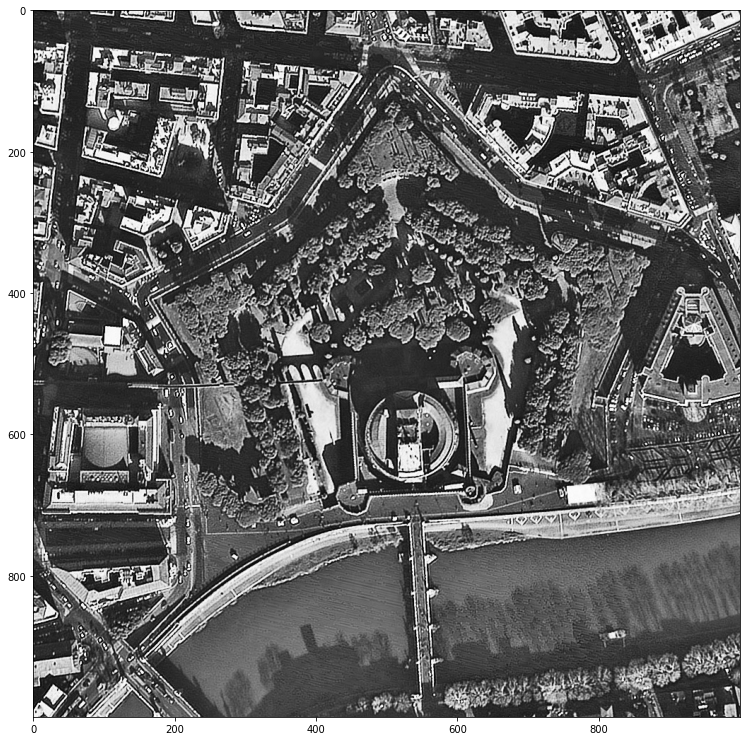

In [57]:
plot(bw, True)

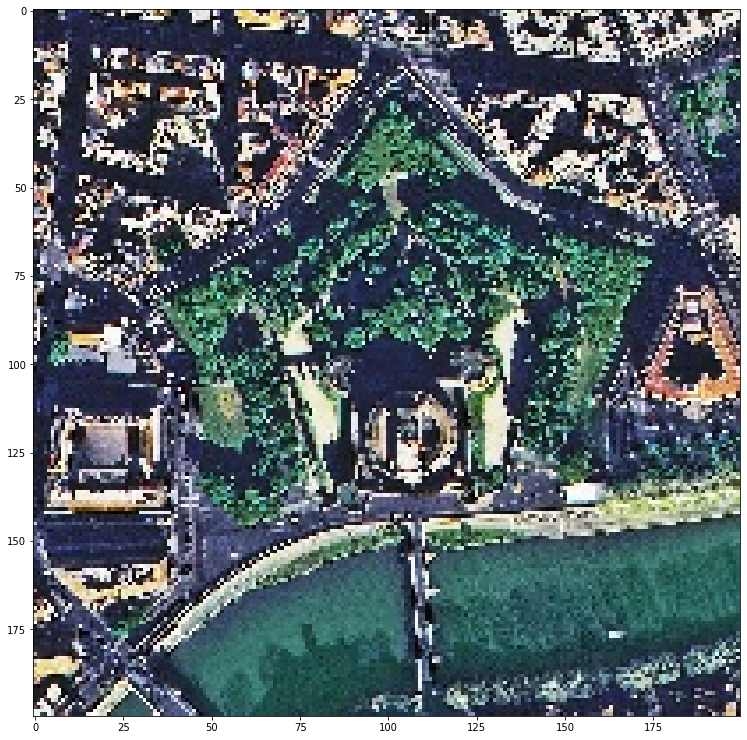

In [61]:
plot(ds)

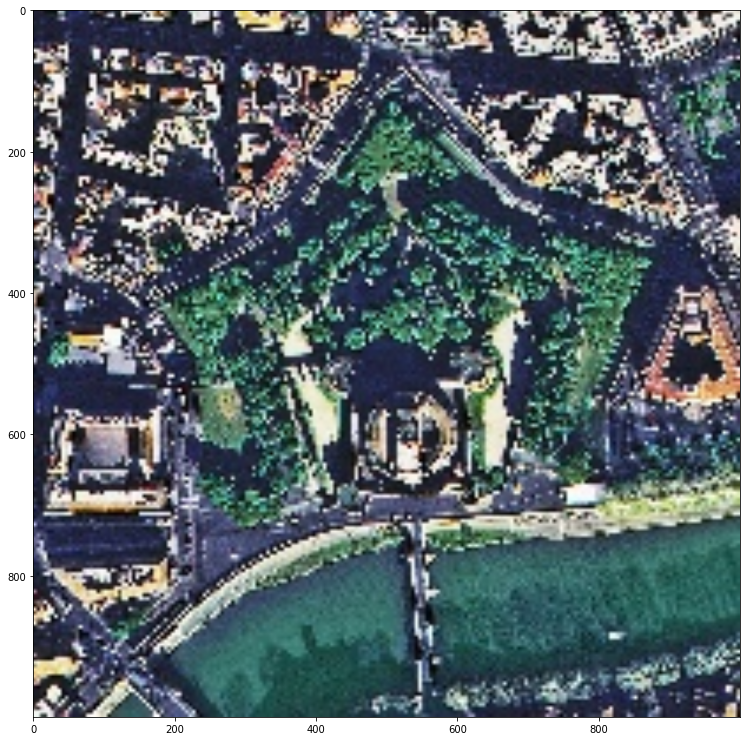

In [66]:
w, h = bw.shape[1], bw.shape[0]
us = cv2.resize(ds, (w, h))

plot(us)

In [78]:
hsv = cv2.cvtColor(us, cv2.COLOR_RGB2HSV)
hsv = hsv.T
h = hsv[0].T
s = hsv[1].T
v = hsv[2].T
hsv = hsv.T

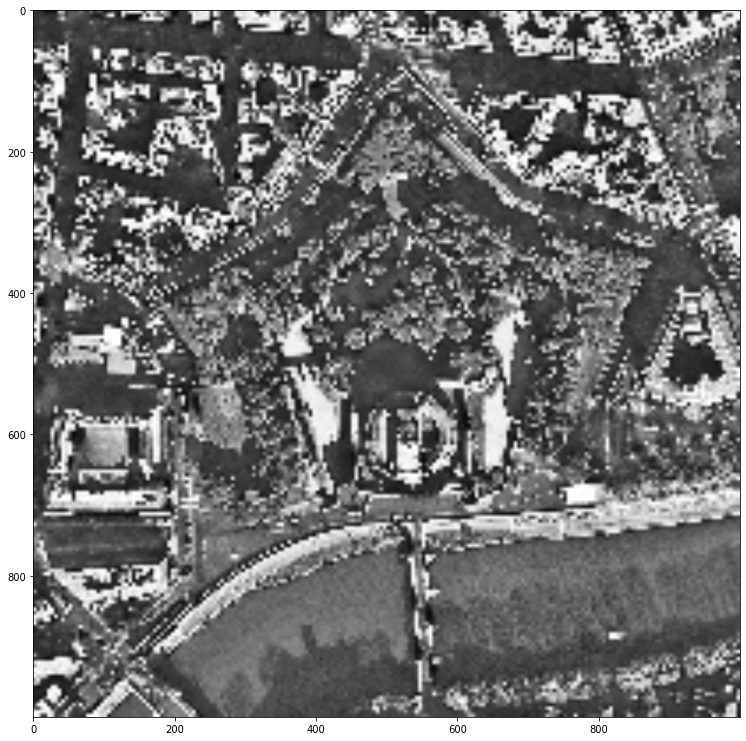

In [75]:
plot(v, True)

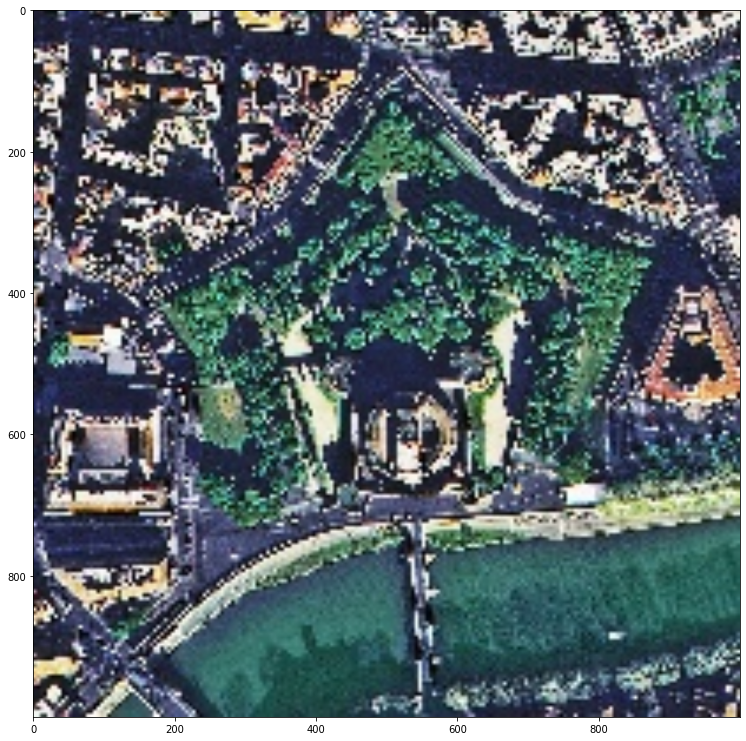

In [80]:
from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plot(from_hsv)

In [81]:
hsv.T[2] = bw.T

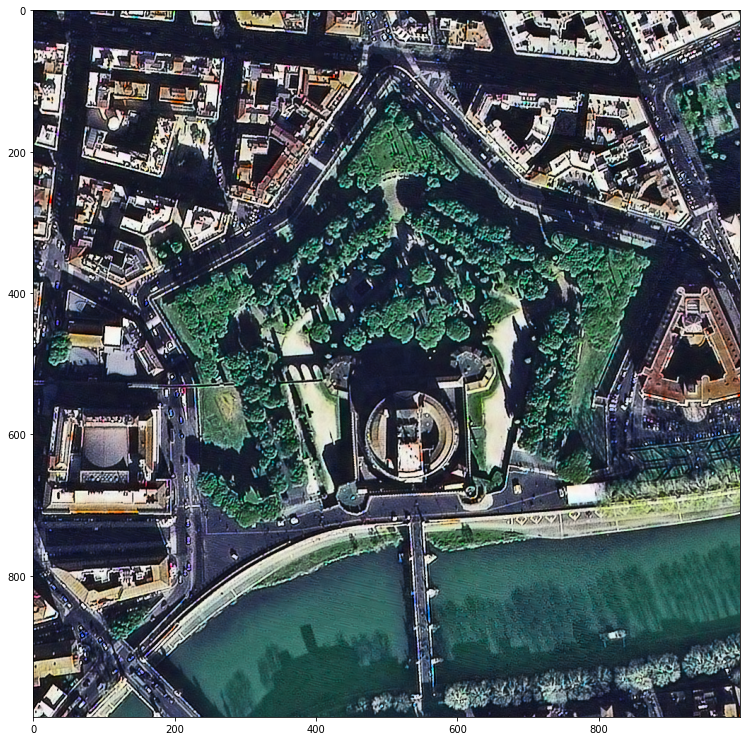

In [83]:
from_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plot(from_hsv)

In [97]:
import numpy as np

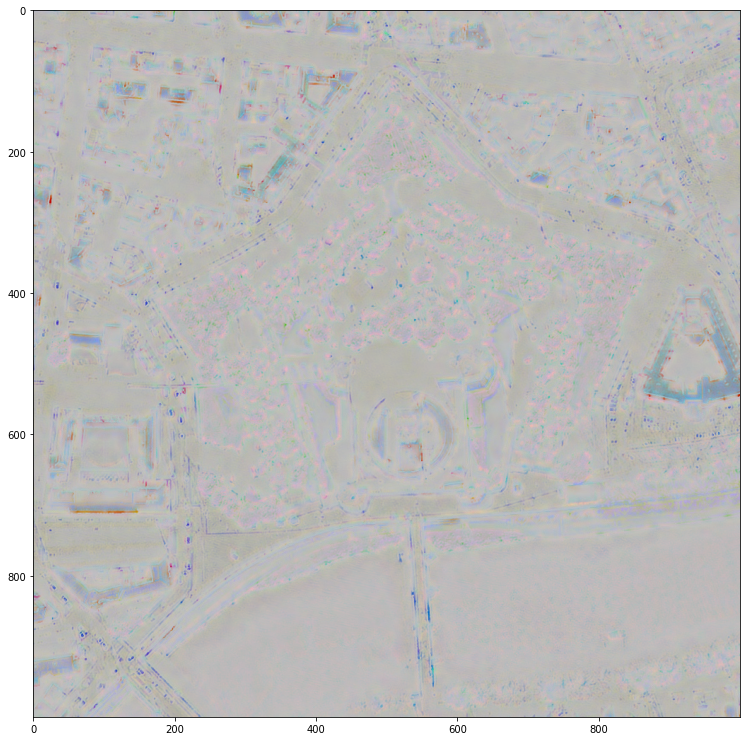

In [115]:
diff = from_hsv.astype(int) - img.astype(int)
diff = np.interp(diff, (diff.min(), diff.max()), (0,255)).astype(int)
plot(diff)

In [110]:
diff.min(), diff.max()

(-255, 83)